In [183]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from textblob import TextBlob

%matplotlib inline




In [184]:
data = pd.read_csv("Tcs.csv")
data


,Date,High Price,Low Price,Close Price,Total Traded Quantity,Turnover (in lacs),No. of Contracts,Unnamed: 7
0,03-Apr-2017,2435.00,2408.20,2411.70,598444,1.447038e+04,6263,NaN
1,05-Apr-2017,2419.90,2395.00,2401.25,1452784,3.489032e+04,8452,NaN
2,06-Apr-2017,2410.00,2392.55,2400.05,860352,2.064533e+04,7025,NaN
3,07-Apr-2017,2433.25,2392.15,2429.05,1138506,2.753949e+04,11681,NaN
4,10-Apr-2017,2449.00,2405.00,2422.25,1271632,3.096273e+04,14843,NaN
5,11-Apr-2017,2443.10,2406.00,2419.30,778892,1.892359e+04,8672,NaN
6,12-Apr-2017,2428.00,2383.00,2393.25,525269,1.262435e+04,8995,NaN
7,13-Apr-2017,2409.00,2321.05,2328.65,1250236,2.926459e+04,21646,NaN
8,17-Apr-2017,2332.90,2295.15,2314.85,1135441,2.622516e+04,16021,NaN
9,18-Apr-2017,2334.20,2302.05,2308.80,865310,2.007052e+04,36373,NaN


In [186]:
date = data[['Date']]
date



,Date
0,03-Apr-2017
1,05-Apr-2017
2,06-Apr-2017
3,07-Apr-2017
4,10-Apr-2017
5,11-Apr-2017
6,12-Apr-2017
7,13-Apr-2017
8,17-Apr-2017
9,18-Apr-2017


In [229]:
data1=data[["Close Price"]]
dataset = data1.values
dataset = data1.astype('float32')


In [230]:
type(dataset)


pandas.core.frame.DataFrame

In [265]:
def getSentiment(text):
    cleanedtext = ' '.join([word for word in text.split(' ') if len(word) > 0 and word[0] != '@' and word[0] != '#' and 'http' not in word and word != 'RT'])
    analysis = TextBlob(cleanedtext)
    sentiment = analysis.sentiment.polarity
    return sentiment

In [266]:
sent = pd.read_csv('file3.csv')

In [267]:
senti = pd.DataFrame([getSentiment(x) for x in sent['Headlines']])

In [190]:
type(dataset)

pandas.core.frame.DataFrame

In [232]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [233]:
train_size = 124
cross_size = 62
test_size = 52
train, cv, test = dataset[0:train_size], dataset[train_size:train_size+cross_size], dataset[train_size+cross_size:]
print(len(train), len(cv), len(test))







124 62 52


In [193]:
type(dataset)


numpy.ndarray

In [253]:
date1 = date[train_size:train_size+51]

In [194]:
type(dataset)

numpy.ndarray

In [234]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [235]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
crossX, crossY =  create_dataset(cv, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)


In [197]:
trainX.shape

(113, 10, 1)

In [236]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1,trainX.shape[1]))
crossX = np.reshape(crossX,(crossX.shape[0],1,crossX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1,testX.shape[1]))
trainX.shape

(113, 1, 10)

In [237]:
model = Sequential()
model.add(LSTM(5, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0175
Epoch 2/100
 - 0s - loss: 0.0168
Epoch 3/100
 - 0s - loss: 0.0160
Epoch 4/100
 - 0s - loss: 0.0153
Epoch 5/100
 - 0s - loss: 0.0146
Epoch 6/100
 - 0s - loss: 0.0140
Epoch 7/100
 - 0s - loss: 0.0133
Epoch 8/100
 - 0s - loss: 0.0127
Epoch 9/100
 - 0s - loss: 0.0121
Epoch 10/100
 - 0s - loss: 0.0115
Epoch 11/100
 - 0s - loss: 0.0110
Epoch 12/100
 - 0s - loss: 0.0105
Epoch 13/100
 - 0s - loss: 0.0100
Epoch 14/100
 - 0s - loss: 0.0095
Epoch 15/100
 - 0s - loss: 0.0090
Epoch 16/100
 - 0s - loss: 0.0086
Epoch 17/100
 - 0s - loss: 0.0082
Epoch 18/100
 - 0s - loss: 0.0078
Epoch 19/100
 - 0s - loss: 0.0074
Epoch 20/100
 - 0s - loss: 0.0071
Epoch 21/100
 - 0s - loss: 0.0068
Epoch 22/100
 - 0s - loss: 0.0065
Epoch 23/100
 - 0s - loss: 0.0062
Epoch 24/100
 - 0s - loss: 0.0060
Epoch 25/100
 - 0s - loss: 0.0057
Epoch 26/100
 - 0s - loss: 0.0055
Epoch 27/100
 - 0s - loss: 0.0053
Epoch 28/100
 - 0s - loss: 0.0052
Epoch 29/100
 - 0s - loss: 0.0050
Epoch 30/100
 - 0s - lo

In [238]:
trainPredict = model.predict(trainX)
cvPredict = model.predict(crossX)
#crossY.shape
trainY.reshape(-1,1)
crossY.reshape(-1,1)

array([[0.3471968 ],
       [0.33860876],
       [0.33569184],
       [0.34001289],
       [0.32975039],
       [0.30976552],
       [0.28702618],
       [0.3361241 ],
       [0.3705844 ],
       [0.3790105 ],
       [0.35616304],
       [0.38133296],
       [0.37479758],
       [0.4238955 ],
       [0.47196722],
       [0.49891974],
       [0.500432  ],
       [0.47056282],
       [0.52479199],
       [0.47688247],
       [0.46683597],
       [0.5115047 ],
       [0.46899649],
       [0.46483738],
       [0.43188934],
       [0.44020732],
       [0.44085558],
       [0.44820142],
       [0.4458249 ],
       [0.4452307 ],
       [0.41590139],
       [0.39305393],
       [0.38543802],
       [0.38803081],
       [0.3914876 ],
       [0.38905701],
       [0.37171873],
       [0.35470458],
       [0.41908838],
       [0.36620928],
       [0.38376356],
       [0.30749712],
       [0.29431796],
       [0.33201905],
       [0.32640173],
       [0.34114722],
       [0.348439  ],
       [0.403

In [241]:
trainY

array([[0.02808685],
       [0.05655189],
       [0.04067207],
       [0.05936068],
       [0.04142821],
       [0.04018601],
       [0.03186777],
       [0.        ],
       [0.01809441],
       [0.06929905],
       [0.06152121],
       [0.05115058],
       [0.0748623 ],
       [0.08577307],
       [0.06405967],
       [0.08242415],
       [0.09452304],
       [0.09933043],
       [0.16852108],
       [0.19682419],
       [0.28416333],
       [0.25278163],
       [0.27892421],
       [0.26849951],
       [0.30895532],
       [0.37965877],
       [0.32958846],
       [0.32375514],
       [0.30025941],
       [0.29539823],
       [0.30296007],
       [0.31516683],
       [0.35735117],
       [0.45678947],
       [0.3695582 ],
       [0.26839164],
       [0.25261969],
       [0.23123042],
       [0.19271914],
       [0.21286595],
       [0.14913041],
       [0.13670738],
       [0.17127581],
       [0.18564336],
       [0.14383722],
       [0.13146826],
       [0.09565737],
       [0.075

In [242]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
cvPredict = scaler.inverse_transform(cvPredict)
crossY = scaler.inverse_transform(crossY)

In [220]:
trainY[:,0]

array([1.97229602e+09, 1.99487597e+09, 1.98227927e+09, 1.99710405e+09,
       1.98287908e+09, 1.98189370e+09, 1.97529524e+09, 1.95001608e+09,
       1.96436950e+09, 2.00498768e+09, 1.99881789e+09, 1.99059136e+09,
       2.00940074e+09, 2.01805572e+09, 2.00083153e+09, 2.01539918e+09,
       2.02499665e+09, 2.02881012e+09, 2.08369573e+09, 2.10614723e+09,
       2.17542915e+09, 2.15053556e+09, 2.17127321e+09, 2.16300380e+09,
       2.19509544e+09, 2.25118108e+09, 2.21146271e+09, 2.20683543e+09,
       2.18819740e+09, 2.18434125e+09, 2.19033970e+09, 2.20002274e+09,
       2.23348554e+09, 2.31236514e+09, 2.24316879e+09, 2.16291823e+09,
       2.15040710e+09, 2.13344003e+09, 2.10289088e+09, 2.11887237e+09,
       2.06831404e+09, 2.05845945e+09, 2.08588092e+09, 2.09727801e+09,
       2.06411522e+09, 2.05430351e+09, 2.02589646e+09, 2.00974363e+09,
       2.01591342e+09, 2.00151711e+09, 2.02645359e+09, 2.03609395e+09,
       2.03030973e+09, 2.02101205e+09, 2.01377112e+09, 2.00040307e+09,
      

In [243]:
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
cvScore = math.sqrt(mean_squared_error(crossY[:,0], cvPredict[:, 0]))
print('Test Score: %.2f RMSE' % (cvScore))

Train Score: 0.06 RMSE
Test Score: 0.11 RMSE


In [252]:
date1.shape



(62, 1)

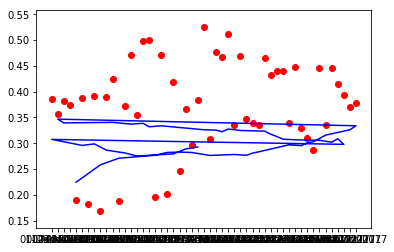

In [264]:


plt.scatter(date1,cv[0:51],color="Red")
plt.plot(date1,cvPredict,color="Blue")



In [19]:
mintrain = 10000
valtrain = 0
mincv = 10000
valcv = 0
for j in range(1,31):
    look_back = 10
    trainX, trainY = create_dataset(train, look_back=look_back)
    crossX, crossY =  create_dataset(cv, look_back=look_back)
    testX, testY = create_dataset(test, look_back=look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], 1,trainX.shape[1]))
    crossX = np.reshape(crossX,(crossX.shape[0],1,crossX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1,testX.shape[1]))
    trainX.shape
    model = Sequential()
    model.add(LSTM(j, input_shape=(1,look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)
    trainPredict = model.predict(trainX)
    cvPredict = model.predict(crossX)
    #crossY.shape
    trainY.reshape(-1,1)
    crossY.reshape(-1,1)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    cvPredict = scaler.inverse_transform(cvPredict)
    crossY = scaler.inverse_transform([crossY])
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
    cvScore = math.sqrt(mean_squared_error(crossY[0], cvPredict[:, 0]))
    if mintrain > trainScore:
        mintrain = trainScore
        valtrain = j
    if mincv > cvScore:
        mincv = cvScore
        valcv = j

Epoch 1/100
 - 2s - loss: 0.0426
Epoch 2/100
 - 0s - loss: 0.0421
Epoch 3/100
 - 0s - loss: 0.0416
Epoch 4/100
 - 0s - loss: 0.0411
Epoch 5/100
 - 0s - loss: 0.0406
Epoch 6/100
 - 0s - loss: 0.0401
Epoch 7/100
 - 0s - loss: 0.0396
Epoch 8/100
 - 0s - loss: 0.0391
Epoch 9/100
 - 0s - loss: 0.0386
Epoch 10/100
 - 0s - loss: 0.0381
Epoch 11/100
 - 0s - loss: 0.0376
Epoch 12/100
 - 0s - loss: 0.0371
Epoch 13/100
 - 0s - loss: 0.0366
Epoch 14/100
 - 0s - loss: 0.0362
Epoch 15/100
 - 0s - loss: 0.0357
Epoch 16/100
 - 0s - loss: 0.0352
Epoch 17/100
 - 0s - loss: 0.0347
Epoch 18/100
 - 0s - loss: 0.0343
Epoch 19/100
 - 0s - loss: 0.0338
Epoch 20/100
 - 0s - loss: 0.0333
Epoch 21/100
 - 0s - loss: 0.0329
Epoch 22/100
 - 0s - loss: 0.0324
Epoch 23/100
 - 0s - loss: 0.0320
Epoch 24/100
 - 0s - loss: 0.0315
Epoch 25/100
 - 0s - loss: 0.0311
Epoch 26/100
 - 0s - loss: 0.0307
Epoch 27/100
 - 0s - loss: 0.0302
Epoch 28/100
 - 0s - loss: 0.0298
Epoch 29/100
 - 0s - loss: 0.0294
Epoch 30/100
 - 0s - lo

Epoch 43/100
 - 0s - loss: 0.0362
Epoch 44/100
 - 0s - loss: 0.0355
Epoch 45/100
 - 0s - loss: 0.0348
Epoch 46/100
 - 0s - loss: 0.0342
Epoch 47/100
 - 0s - loss: 0.0335
Epoch 48/100
 - 0s - loss: 0.0329
Epoch 49/100
 - 0s - loss: 0.0322
Epoch 50/100
 - 0s - loss: 0.0316
Epoch 51/100
 - 0s - loss: 0.0310
Epoch 52/100
 - 0s - loss: 0.0304
Epoch 53/100
 - 0s - loss: 0.0298
Epoch 54/100
 - 0s - loss: 0.0292
Epoch 55/100
 - 0s - loss: 0.0286
Epoch 56/100
 - 0s - loss: 0.0281
Epoch 57/100
 - 0s - loss: 0.0275
Epoch 58/100
 - 0s - loss: 0.0270
Epoch 59/100
 - 0s - loss: 0.0264
Epoch 60/100
 - 0s - loss: 0.0259
Epoch 61/100
 - 0s - loss: 0.0254
Epoch 62/100
 - 0s - loss: 0.0249
Epoch 63/100
 - 0s - loss: 0.0244
Epoch 64/100
 - 0s - loss: 0.0239
Epoch 65/100
 - 0s - loss: 0.0234
Epoch 66/100
 - 0s - loss: 0.0229
Epoch 67/100
 - 0s - loss: 0.0225
Epoch 68/100
 - 0s - loss: 0.0220
Epoch 69/100
 - 0s - loss: 0.0215
Epoch 70/100
 - 0s - loss: 0.0211
Epoch 71/100
 - 0s - loss: 0.0207
Epoch 72/100
 

Epoch 85/100
 - 0s - loss: 0.0037
Epoch 86/100
 - 0s - loss: 0.0037
Epoch 87/100
 - 0s - loss: 0.0037
Epoch 88/100
 - 0s - loss: 0.0037
Epoch 89/100
 - 0s - loss: 0.0037
Epoch 90/100
 - 0s - loss: 0.0037
Epoch 91/100
 - 0s - loss: 0.0037
Epoch 92/100
 - 0s - loss: 0.0037
Epoch 93/100
 - 0s - loss: 0.0037
Epoch 94/100
 - 0s - loss: 0.0037
Epoch 95/100
 - 0s - loss: 0.0036
Epoch 96/100
 - 0s - loss: 0.0036
Epoch 97/100
 - 0s - loss: 0.0036
Epoch 98/100
 - 0s - loss: 0.0036
Epoch 99/100
 - 0s - loss: 0.0036
Epoch 100/100
 - 0s - loss: 0.0036
Epoch 1/100
 - 2s - loss: 0.0385
Epoch 2/100
 - 0s - loss: 0.0377
Epoch 3/100
 - 0s - loss: 0.0368
Epoch 4/100
 - 0s - loss: 0.0360
Epoch 5/100
 - 0s - loss: 0.0352
Epoch 6/100
 - 0s - loss: 0.0344
Epoch 7/100
 - 0s - loss: 0.0336
Epoch 8/100
 - 0s - loss: 0.0328
Epoch 9/100
 - 0s - loss: 0.0320
Epoch 10/100
 - 0s - loss: 0.0312
Epoch 11/100
 - 0s - loss: 0.0305
Epoch 12/100
 - 0s - loss: 0.0297
Epoch 13/100
 - 0s - loss: 0.0290
Epoch 14/100
 - 0s - l

Epoch 27/100
 - 0s - loss: 0.0271
Epoch 28/100
 - 0s - loss: 0.0263
Epoch 29/100
 - 0s - loss: 0.0255
Epoch 30/100
 - 0s - loss: 0.0247
Epoch 31/100
 - 0s - loss: 0.0239
Epoch 32/100
 - 0s - loss: 0.0232
Epoch 33/100
 - 0s - loss: 0.0224
Epoch 34/100
 - 0s - loss: 0.0217
Epoch 35/100
 - 0s - loss: 0.0210
Epoch 36/100
 - 0s - loss: 0.0203
Epoch 37/100
 - 0s - loss: 0.0197
Epoch 38/100
 - 0s - loss: 0.0190
Epoch 39/100
 - 0s - loss: 0.0184
Epoch 40/100
 - 0s - loss: 0.0178
Epoch 41/100
 - 0s - loss: 0.0172
Epoch 42/100
 - 0s - loss: 0.0166
Epoch 43/100
 - 0s - loss: 0.0161
Epoch 44/100
 - 0s - loss: 0.0155
Epoch 45/100
 - 0s - loss: 0.0150
Epoch 46/100
 - 0s - loss: 0.0145
Epoch 47/100
 - 0s - loss: 0.0140
Epoch 48/100
 - 0s - loss: 0.0136
Epoch 49/100
 - 0s - loss: 0.0131
Epoch 50/100
 - 0s - loss: 0.0127
Epoch 51/100
 - 0s - loss: 0.0122
Epoch 52/100
 - 0s - loss: 0.0118
Epoch 53/100
 - 0s - loss: 0.0114
Epoch 54/100
 - 0s - loss: 0.0111
Epoch 55/100
 - 0s - loss: 0.0107
Epoch 56/100
 

Epoch 69/100
 - 0s - loss: 0.0033
Epoch 70/100
 - 0s - loss: 0.0033
Epoch 71/100
 - 0s - loss: 0.0033
Epoch 72/100
 - 0s - loss: 0.0032
Epoch 73/100
 - 0s - loss: 0.0032
Epoch 74/100
 - 0s - loss: 0.0032
Epoch 75/100
 - 0s - loss: 0.0032
Epoch 76/100
 - 0s - loss: 0.0032
Epoch 77/100
 - 0s - loss: 0.0032
Epoch 78/100
 - 0s - loss: 0.0032
Epoch 79/100
 - 0s - loss: 0.0032
Epoch 80/100
 - 0s - loss: 0.0032
Epoch 81/100
 - 0s - loss: 0.0032
Epoch 82/100
 - 0s - loss: 0.0032
Epoch 83/100
 - 0s - loss: 0.0032
Epoch 84/100
 - 0s - loss: 0.0032
Epoch 85/100
 - 0s - loss: 0.0032
Epoch 86/100
 - 0s - loss: 0.0031
Epoch 87/100
 - 0s - loss: 0.0031
Epoch 88/100
 - 0s - loss: 0.0031
Epoch 89/100
 - 0s - loss: 0.0031
Epoch 90/100
 - 0s - loss: 0.0031
Epoch 91/100
 - 0s - loss: 0.0031
Epoch 92/100
 - 0s - loss: 0.0031
Epoch 93/100
 - 0s - loss: 0.0031
Epoch 94/100
 - 0s - loss: 0.0031
Epoch 95/100
 - 0s - loss: 0.0031
Epoch 96/100
 - 0s - loss: 0.0031
Epoch 97/100
 - 0s - loss: 0.0031
Epoch 98/100
 

Epoch 11/100
 - 0s - loss: 0.0460
Epoch 12/100
 - 0s - loss: 0.0444
Epoch 13/100
 - 0s - loss: 0.0429
Epoch 14/100
 - 0s - loss: 0.0413
Epoch 15/100
 - 0s - loss: 0.0399
Epoch 16/100
 - 0s - loss: 0.0384
Epoch 17/100
 - 0s - loss: 0.0370
Epoch 18/100
 - 0s - loss: 0.0356
Epoch 19/100
 - 0s - loss: 0.0343
Epoch 20/100
 - 0s - loss: 0.0330
Epoch 21/100
 - 0s - loss: 0.0317
Epoch 22/100
 - 0s - loss: 0.0305
Epoch 23/100
 - 0s - loss: 0.0293
Epoch 24/100
 - 0s - loss: 0.0282
Epoch 25/100
 - 0s - loss: 0.0270
Epoch 26/100
 - 0s - loss: 0.0260
Epoch 27/100
 - 0s - loss: 0.0249
Epoch 28/100
 - 0s - loss: 0.0239
Epoch 29/100
 - 0s - loss: 0.0229
Epoch 30/100
 - 0s - loss: 0.0220
Epoch 31/100
 - 0s - loss: 0.0210
Epoch 32/100
 - 0s - loss: 0.0201
Epoch 33/100
 - 0s - loss: 0.0193
Epoch 34/100
 - 0s - loss: 0.0185
Epoch 35/100
 - 0s - loss: 0.0177
Epoch 36/100
 - 0s - loss: 0.0169
Epoch 37/100
 - 0s - loss: 0.0161
Epoch 38/100
 - 0s - loss: 0.0154
Epoch 39/100
 - 0s - loss: 0.0147
Epoch 40/100
 

Epoch 53/100
 - 0s - loss: 0.0040
Epoch 54/100
 - 0s - loss: 0.0040
Epoch 55/100
 - 0s - loss: 0.0040
Epoch 56/100
 - 0s - loss: 0.0040
Epoch 57/100
 - 0s - loss: 0.0040
Epoch 58/100
 - 0s - loss: 0.0040
Epoch 59/100
 - 0s - loss: 0.0040
Epoch 60/100
 - 0s - loss: 0.0040
Epoch 61/100
 - 0s - loss: 0.0040
Epoch 62/100
 - 0s - loss: 0.0040
Epoch 63/100
 - 0s - loss: 0.0039
Epoch 64/100
 - 0s - loss: 0.0039
Epoch 65/100
 - 0s - loss: 0.0039
Epoch 66/100
 - 0s - loss: 0.0039
Epoch 67/100
 - 0s - loss: 0.0039
Epoch 68/100
 - 0s - loss: 0.0039
Epoch 69/100
 - 0s - loss: 0.0039
Epoch 70/100
 - 0s - loss: 0.0038
Epoch 71/100
 - 0s - loss: 0.0038
Epoch 72/100
 - 0s - loss: 0.0038
Epoch 73/100
 - 0s - loss: 0.0038
Epoch 74/100
 - 0s - loss: 0.0038
Epoch 75/100
 - 0s - loss: 0.0038
Epoch 76/100
 - 0s - loss: 0.0038
Epoch 77/100
 - 0s - loss: 0.0038
Epoch 78/100
 - 0s - loss: 0.0038
Epoch 79/100
 - 0s - loss: 0.0038
Epoch 80/100
 - 0s - loss: 0.0038
Epoch 81/100
 - 0s - loss: 0.0038
Epoch 82/100
 

Epoch 95/100
 - 0s - loss: 0.0041
Epoch 96/100
 - 0s - loss: 0.0041
Epoch 97/100
 - 0s - loss: 0.0041
Epoch 98/100
 - 0s - loss: 0.0041
Epoch 99/100
 - 0s - loss: 0.0041
Epoch 100/100
 - 0s - loss: 0.0041
Epoch 1/100
 - 3s - loss: 0.0401
Epoch 2/100
 - 0s - loss: 0.0382
Epoch 3/100
 - 0s - loss: 0.0364
Epoch 4/100
 - 0s - loss: 0.0347
Epoch 5/100
 - 0s - loss: 0.0329
Epoch 6/100
 - 0s - loss: 0.0313
Epoch 7/100
 - 0s - loss: 0.0297
Epoch 8/100
 - 0s - loss: 0.0281
Epoch 9/100
 - 0s - loss: 0.0266
Epoch 10/100
 - 0s - loss: 0.0251
Epoch 11/100
 - 0s - loss: 0.0237
Epoch 12/100
 - 0s - loss: 0.0224
Epoch 13/100
 - 0s - loss: 0.0211
Epoch 14/100
 - 0s - loss: 0.0198
Epoch 15/100
 - 0s - loss: 0.0186
Epoch 16/100
 - 0s - loss: 0.0175
Epoch 17/100
 - 0s - loss: 0.0164
Epoch 18/100
 - 0s - loss: 0.0154
Epoch 19/100
 - 0s - loss: 0.0144
Epoch 20/100
 - 0s - loss: 0.0134
Epoch 21/100
 - 0s - loss: 0.0126
Epoch 22/100
 - 0s - loss: 0.0117
Epoch 23/100
 - 0s - loss: 0.0110
Epoch 24/100
 - 0s - l

Epoch 37/100
 - 0s - loss: 0.0070
Epoch 38/100
 - 0s - loss: 0.0066
Epoch 39/100
 - 0s - loss: 0.0063
Epoch 40/100
 - 0s - loss: 0.0060
Epoch 41/100
 - 0s - loss: 0.0057
Epoch 42/100
 - 0s - loss: 0.0055
Epoch 43/100
 - 0s - loss: 0.0053
Epoch 44/100
 - 0s - loss: 0.0051
Epoch 45/100
 - 0s - loss: 0.0050
Epoch 46/100
 - 0s - loss: 0.0048
Epoch 47/100
 - 0s - loss: 0.0047
Epoch 48/100
 - 0s - loss: 0.0046
Epoch 49/100
 - 0s - loss: 0.0046
Epoch 50/100
 - 0s - loss: 0.0045
Epoch 51/100
 - 0s - loss: 0.0044
Epoch 52/100
 - 0s - loss: 0.0044
Epoch 53/100
 - 0s - loss: 0.0044
Epoch 54/100
 - 0s - loss: 0.0044
Epoch 55/100
 - 0s - loss: 0.0044
Epoch 56/100
 - 0s - loss: 0.0043
Epoch 57/100
 - 0s - loss: 0.0043
Epoch 58/100
 - 0s - loss: 0.0043
Epoch 59/100
 - 0s - loss: 0.0043
Epoch 60/100
 - 0s - loss: 0.0043
Epoch 61/100
 - 0s - loss: 0.0043
Epoch 62/100
 - 0s - loss: 0.0044
Epoch 63/100
 - 0s - loss: 0.0044
Epoch 64/100
 - 0s - loss: 0.0044
Epoch 65/100
 - 0s - loss: 0.0044
Epoch 66/100
 

Epoch 79/100
 - 0s - loss: 0.0038
Epoch 80/100
 - 0s - loss: 0.0037
Epoch 81/100
 - 0s - loss: 0.0037
Epoch 82/100
 - 0s - loss: 0.0037
Epoch 83/100
 - 0s - loss: 0.0037
Epoch 84/100
 - 0s - loss: 0.0037
Epoch 85/100
 - 0s - loss: 0.0037
Epoch 86/100
 - 0s - loss: 0.0037
Epoch 87/100
 - 0s - loss: 0.0037
Epoch 88/100
 - 0s - loss: 0.0037
Epoch 89/100
 - 0s - loss: 0.0037
Epoch 90/100
 - 0s - loss: 0.0037
Epoch 91/100
 - 0s - loss: 0.0037
Epoch 92/100
 - 0s - loss: 0.0037
Epoch 93/100
 - 0s - loss: 0.0037
Epoch 94/100
 - 0s - loss: 0.0037
Epoch 95/100
 - 0s - loss: 0.0036
Epoch 96/100
 - 0s - loss: 0.0036
Epoch 97/100
 - 0s - loss: 0.0036
Epoch 98/100
 - 0s - loss: 0.0036
Epoch 99/100
 - 0s - loss: 0.0036
Epoch 100/100
 - 0s - loss: 0.0036
Epoch 1/100
 - 4s - loss: 0.0588
Epoch 2/100
 - 0s - loss: 0.0557
Epoch 3/100
 - 0s - loss: 0.0528
Epoch 4/100
 - 0s - loss: 0.0499
Epoch 5/100
 - 0s - loss: 0.0472
Epoch 6/100
 - 0s - loss: 0.0445
Epoch 7/100
 - 0s - loss: 0.0419
Epoch 8/100
 - 0s - 

Epoch 21/100
 - 0s - loss: 0.0126
Epoch 22/100
 - 0s - loss: 0.0116
Epoch 23/100
 - 0s - loss: 0.0107
Epoch 24/100
 - 0s - loss: 0.0099
Epoch 25/100
 - 0s - loss: 0.0091
Epoch 26/100
 - 0s - loss: 0.0084
Epoch 27/100
 - 0s - loss: 0.0077
Epoch 28/100
 - 0s - loss: 0.0071
Epoch 29/100
 - 0s - loss: 0.0066
Epoch 30/100
 - 0s - loss: 0.0062
Epoch 31/100
 - 0s - loss: 0.0058
Epoch 32/100
 - 0s - loss: 0.0054
Epoch 33/100
 - 0s - loss: 0.0051
Epoch 34/100
 - 0s - loss: 0.0049
Epoch 35/100
 - 0s - loss: 0.0047
Epoch 36/100
 - 0s - loss: 0.0045
Epoch 37/100
 - 0s - loss: 0.0043
Epoch 38/100
 - 0s - loss: 0.0042
Epoch 39/100
 - 0s - loss: 0.0042
Epoch 40/100
 - 0s - loss: 0.0041
Epoch 41/100
 - 0s - loss: 0.0041
Epoch 42/100
 - 0s - loss: 0.0041
Epoch 43/100
 - 0s - loss: 0.0040
Epoch 44/100
 - 0s - loss: 0.0040
Epoch 45/100
 - 0s - loss: 0.0041
Epoch 46/100
 - 0s - loss: 0.0041
Epoch 47/100
 - 0s - loss: 0.0041
Epoch 48/100
 - 0s - loss: 0.0041
Epoch 49/100
 - 0s - loss: 0.0041
Epoch 50/100
 

Epoch 63/100
 - 0s - loss: 0.0043
Epoch 64/100
 - 0s - loss: 0.0043
Epoch 65/100
 - 0s - loss: 0.0043
Epoch 66/100
 - 0s - loss: 0.0042
Epoch 67/100
 - 0s - loss: 0.0042
Epoch 68/100
 - 0s - loss: 0.0042
Epoch 69/100
 - 0s - loss: 0.0042
Epoch 70/100
 - 0s - loss: 0.0042
Epoch 71/100
 - 0s - loss: 0.0042
Epoch 72/100
 - 0s - loss: 0.0041
Epoch 73/100
 - 0s - loss: 0.0041
Epoch 74/100
 - 0s - loss: 0.0041
Epoch 75/100
 - 0s - loss: 0.0041
Epoch 76/100
 - 0s - loss: 0.0041
Epoch 77/100
 - 0s - loss: 0.0041
Epoch 78/100
 - 0s - loss: 0.0041
Epoch 79/100
 - 0s - loss: 0.0041
Epoch 80/100
 - 0s - loss: 0.0041
Epoch 81/100
 - 0s - loss: 0.0041
Epoch 82/100
 - 0s - loss: 0.0040
Epoch 83/100
 - 0s - loss: 0.0040
Epoch 84/100
 - 0s - loss: 0.0040
Epoch 85/100
 - 0s - loss: 0.0040
Epoch 86/100
 - 0s - loss: 0.0040
Epoch 87/100
 - 0s - loss: 0.0040
Epoch 88/100
 - 0s - loss: 0.0040
Epoch 89/100
 - 0s - loss: 0.0040
Epoch 90/100
 - 0s - loss: 0.0040
Epoch 91/100
 - 0s - loss: 0.0040
Epoch 92/100
 

Epoch 5/100
 - 0s - loss: 0.0231
Epoch 6/100
 - 0s - loss: 0.0212
Epoch 7/100
 - 0s - loss: 0.0195
Epoch 8/100
 - 0s - loss: 0.0179
Epoch 9/100
 - 0s - loss: 0.0163
Epoch 10/100
 - 0s - loss: 0.0149
Epoch 11/100
 - 0s - loss: 0.0135
Epoch 12/100
 - 0s - loss: 0.0123
Epoch 13/100
 - 0s - loss: 0.0111
Epoch 14/100
 - 0s - loss: 0.0100
Epoch 15/100
 - 0s - loss: 0.0091
Epoch 16/100
 - 0s - loss: 0.0082
Epoch 17/100
 - 0s - loss: 0.0074
Epoch 18/100
 - 0s - loss: 0.0067
Epoch 19/100
 - 0s - loss: 0.0061
Epoch 20/100
 - 0s - loss: 0.0055
Epoch 21/100
 - 0s - loss: 0.0051
Epoch 22/100
 - 0s - loss: 0.0047
Epoch 23/100
 - 0s - loss: 0.0044
Epoch 24/100
 - 0s - loss: 0.0042
Epoch 25/100
 - 0s - loss: 0.0040
Epoch 26/100
 - 0s - loss: 0.0039
Epoch 27/100
 - 0s - loss: 0.0038
Epoch 28/100
 - 0s - loss: 0.0037
Epoch 29/100
 - 0s - loss: 0.0037
Epoch 30/100
 - 0s - loss: 0.0037
Epoch 31/100
 - 0s - loss: 0.0037
Epoch 32/100
 - 0s - loss: 0.0038
Epoch 33/100
 - 0s - loss: 0.0038
Epoch 34/100
 - 0s 

In [20]:
mintrain, valtrain

(51.32226742826828, 10)

In [21]:
mincv, valcv

(61.43255102571813, 30)